In [198]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

In [199]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../data/4回目/"
isu = pd.read_csv(fname+"BLE_isu.csv",encoding = 'utf-8')
tent = pd.read_csv(fname+"BLE_tent.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

初期位置
椅子に座る
椅子から立つ
初期位置
テントに入る
テントで正座
テントから出る
初期位置


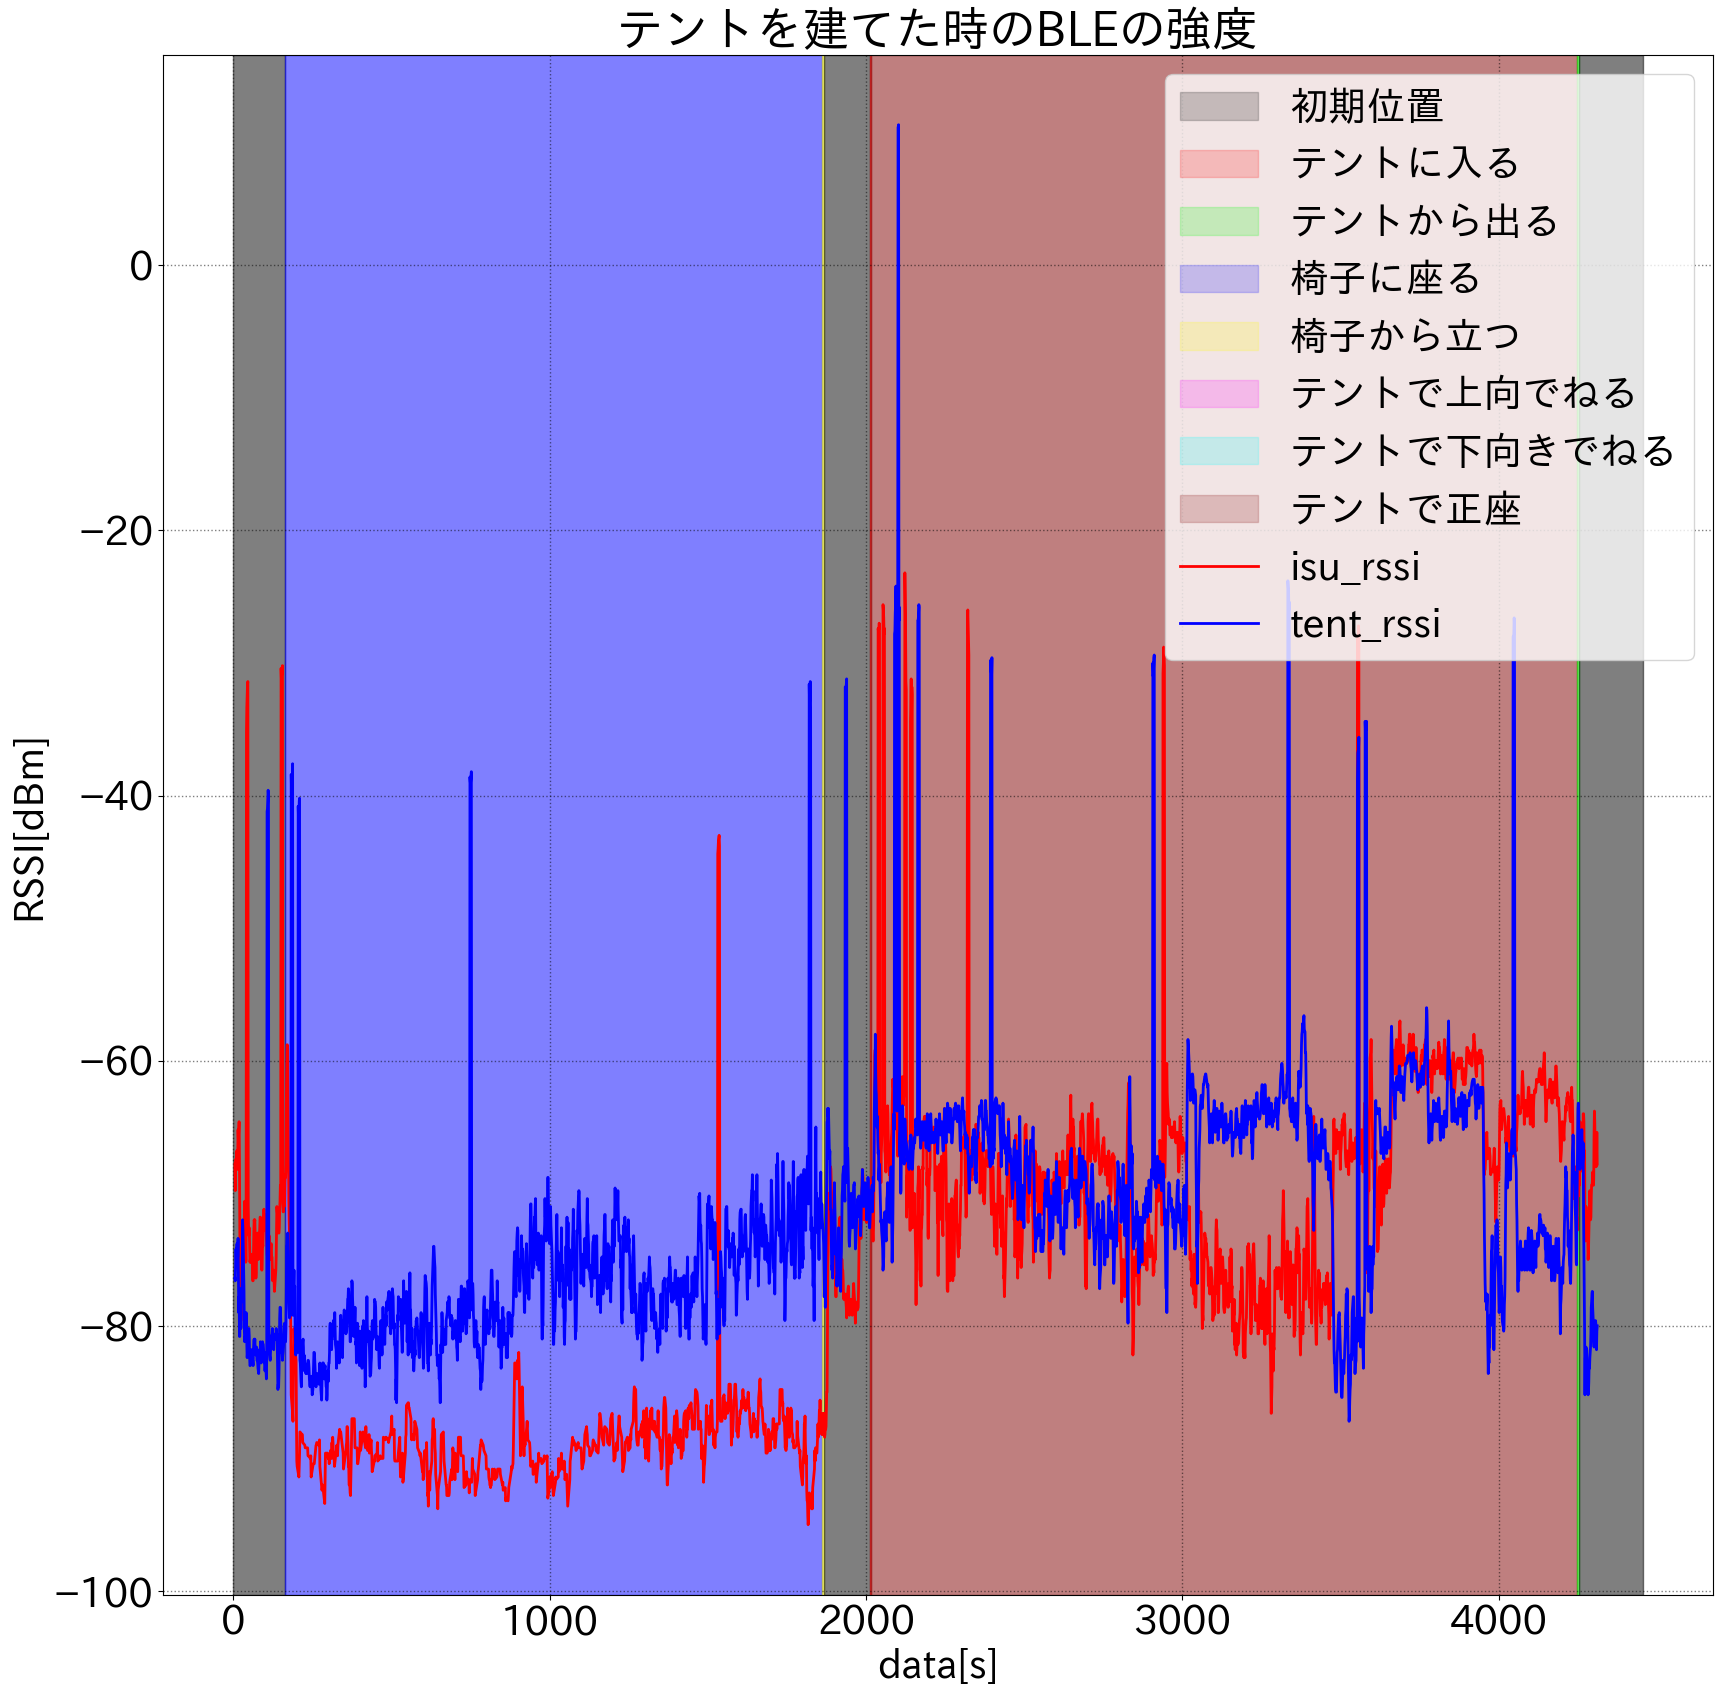

In [200]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("テントを建てた時のBLEの強度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('RSSI[dBm]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
# グラフの描画
ax3.plot(
    (isu["time"] - isu["time"][0]) / 1000,
    isu["rssi"].rolling(window=5).mean(),
    label="rssi",
    linewidth=2,  # 線の太さを指定
    color="red"  # 線の色を赤色に指定
)

ax3.plot(
    (tent["time"] - tent["time"][0]) / 1000,
    tent["rssi"].rolling(window=5).mean(),
    label="rssi",
    linewidth=2,  # 線の太さを指定
    color="blue"  # 線の色を赤色に指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "初期位置": "#00000030",  # アルファ値を下げた色コード（例: 30）
    "テントに入る": "#ff000030",
    "テントから出る": "#00ff0030",
    "椅子に座る": "#0000ff30",
    "椅子から立つ": "#ffff0030",
    "テントで上向でねる": "#ff00ff30",
    "テントで下向きでねる": "#00ffff30",
    "テントで正座": "#80000030"
}

# 階段利用区間をラベリング
# BLEの時だけごりおしついか
padding = 200000  # 200秒

for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000 if i < len(ans) - 1 else (ans["time"].max() + padding - ans["time"][0]) / 1000
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 線の情報を追加
line1 = matplotlib.lines.Line2D([0], [0], color="red", linewidth=2)
line2 = matplotlib.lines.Line2D([0], [0], color="blue", linewidth=2)
content_patches.append(line1)
content_patches.append(line2)
content_labels.append("isu_rssi")
content_labels.append("tent_rssi")

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

テントで正座
start_time: 2014334
end_time: 4247759
[(1068303569, -72), (1068304674, -71), (1068305783, -76), (1068307983, -73), (1068310200, -76), (1068311308, -72), (1068312409, -65), (1068313513, -61), (1068314624, -54), (1068315725, -46), (1068316832, -70), (1068317937, -65), (1068319049, -68), (1068320145, -60), (1068321258, -62), (1068322370, -64), (1068323471, -65), (1068325674, -73), (1068326784, 127), (1068327895, -63), (1068328992, -63), (1068330104, -63), (1068331209, -74), (1068332314, -67), (1068333423, -66), (1068334523, -66), (1068335628, -73), (1068336734, -63), (1068337842, -63), (1068338947, -63), (1068340055, -64), (1068341159, -65), (1068342262, 127), (1068343369, -65), (1068344481, -66), (1068345585, -70), (1068346689, -63), (1068347800, -70), (1068348908, -66), (1068351115, -73), (1068352224, -64), (1068353322, -65), (1068354433, -62), (1068355542, -63), (1068356642, -63), (1068357753, -67), (1068358856, -74), (1068361066, -74), (1068362171, -65), (1068364378, -63), (106

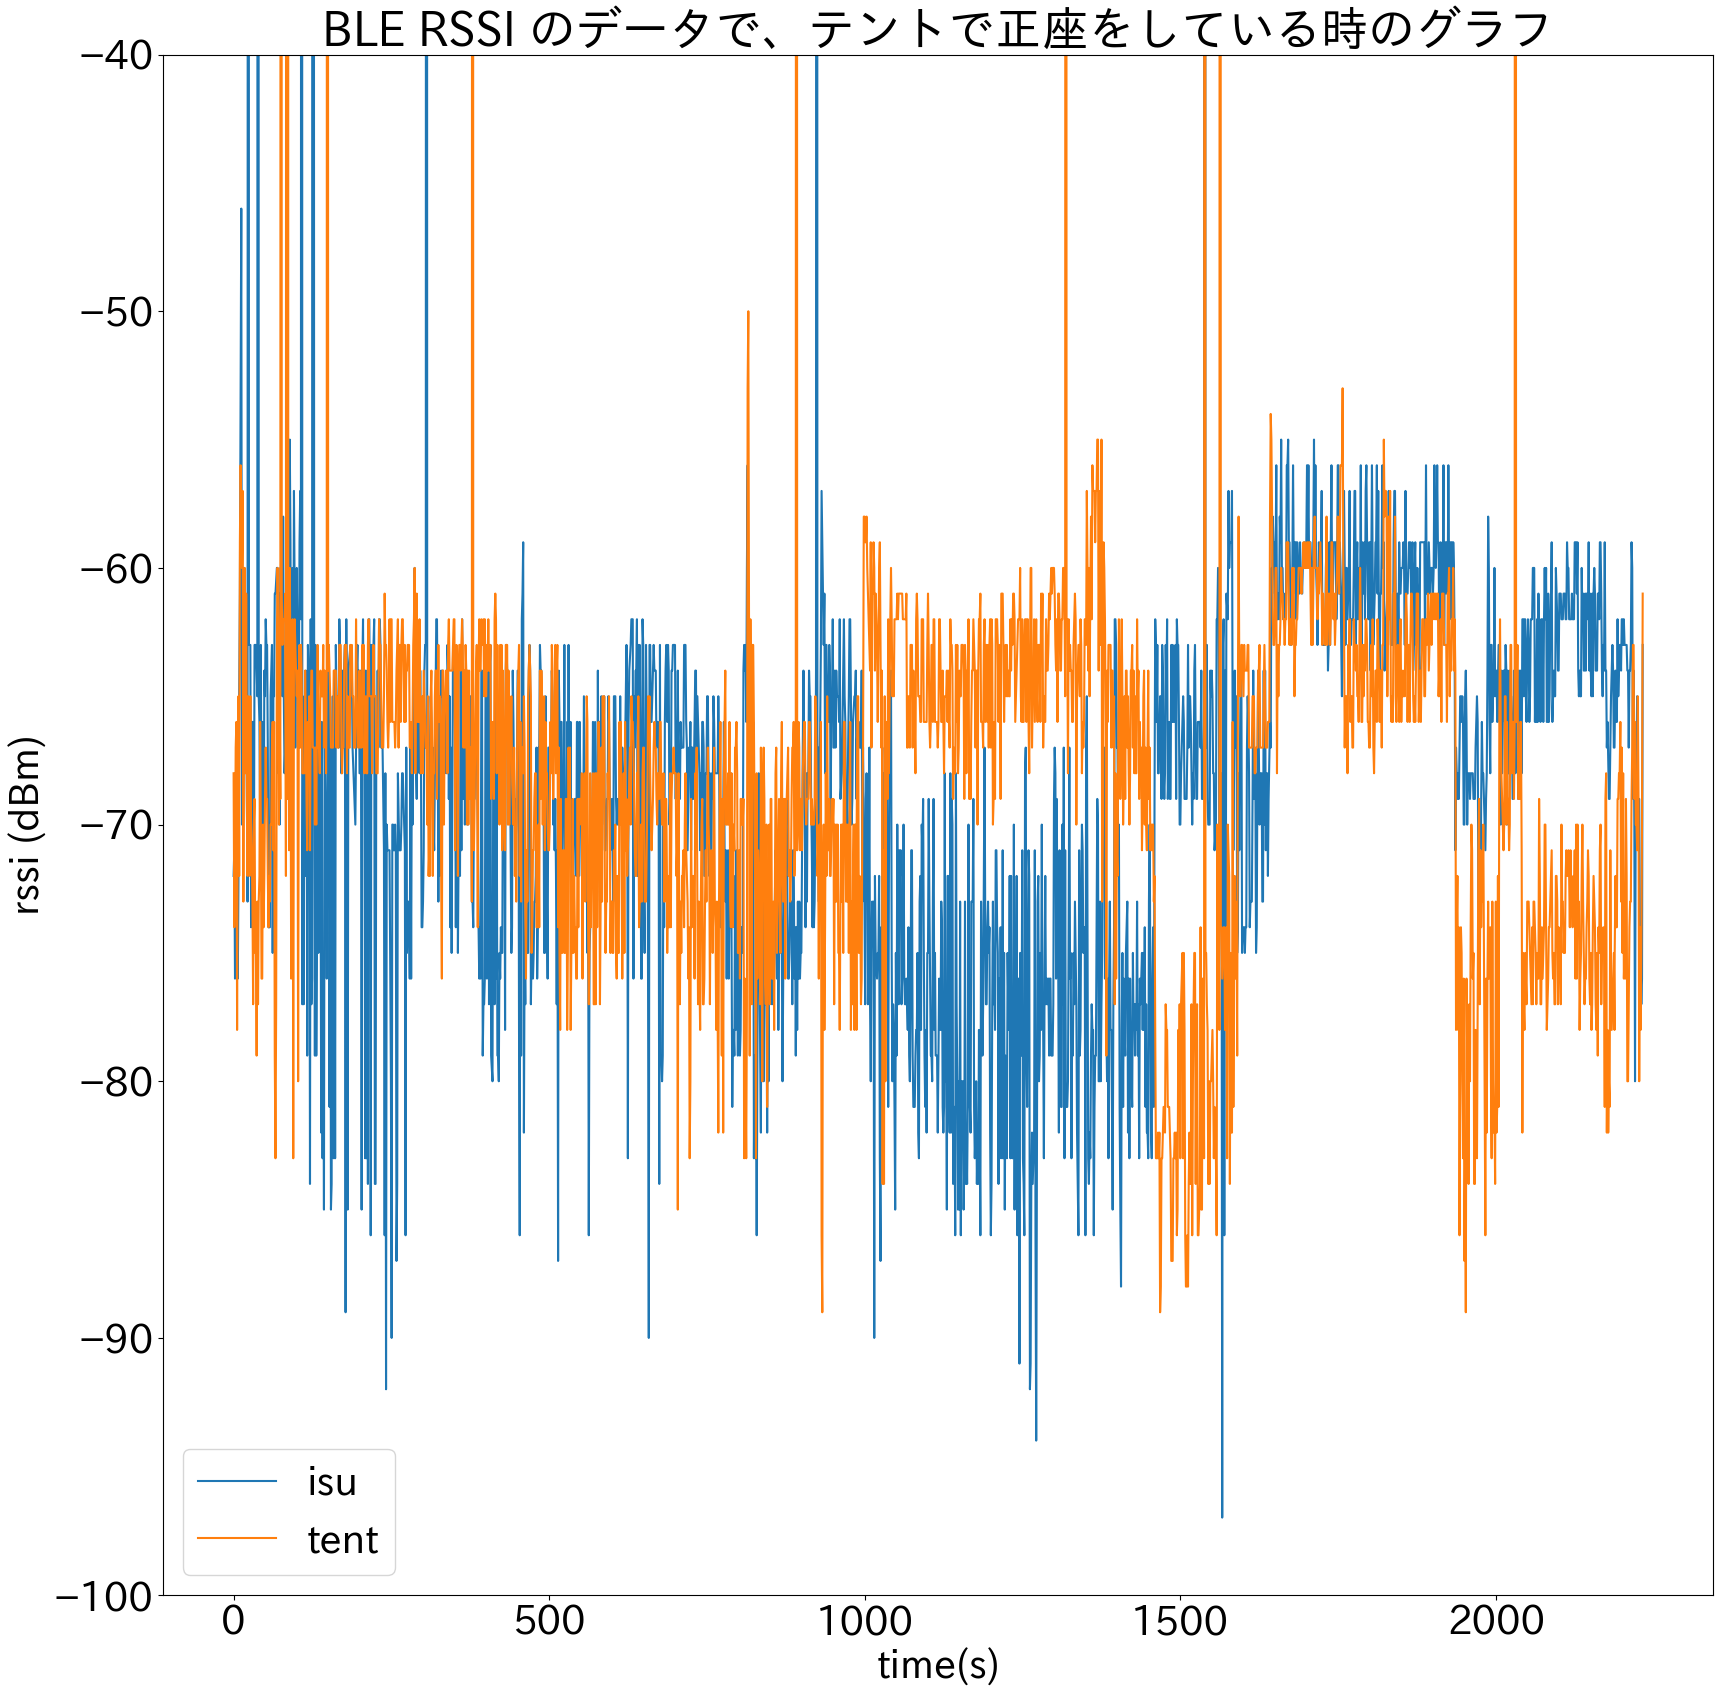

In [201]:
# content毎に分割して、BLEのデータをFFTしてみる
# 椅子に座るだけ取得したデータを使う
# ansデータを使って、椅子に座っているかどうかを判定する


# 5はテント 1は椅子
check = 5
content = ans["content"][check]  # 現在のデータのcontent
print(content)
start_time = (ans["time"][check] - ans["time"][0]) 
end_time = (ans["time"][check + 1] - ans["time"][0]) if check < len(ans) - 1 else (ans["time"].max() + padding - ans["time"][0]) 

# 1. データを取得する
print(f"start_time: {start_time}")
print(f"end_time: {end_time}")

# start_timeからend_timeまでのデータを取得する

fft_isu_data = []
for i in range(len(isu)):
    if start_time <= ( isu["time"][i] - isu["time"][0]) <= end_time:
        # time と rssi のデータを配列に追加する
        fft_isu_data.append((isu["time"][i], isu["rssi"][i]))


fft_tent_data = []
for i in range(len(tent)):
    if start_time <= ( tent["time"][i] - tent["time"][0]) <= end_time:
        # time と rssi のデータを配列に追加する
        fft_tent_data.append((tent["time"][i], tent["rssi"][i]))

print(fft_isu_data)

# print(f"fft_isu_data: {len(fft_isu_data)}")
# print(f"fft_tent_data: {len(fft_tent_data)}")

# fft_isu_dataをグラフ化する
## ｘ軸を時間にする
## y軸をrssiにする

# 2. データをグラフ化する
# 2.1. グラフのタイトルを設定する
plt.figure(figsize=(20, 20))
plt.title(f"BLE RSSI のデータで、{content}をしている時のグラフ")
# 2.2. グラフのx軸のラベルを設定する
plt.xlabel("time(s)")
# 2.3. グラフのy軸のラベルを設定する
plt.ylabel("rssi (dBm)")
# 2.4. グラフのx軸の表示範囲を設定する
# plt.xlim(start_time, end_time)
# 2.5. グラフのy軸の表示範囲を設定する
plt.ylim(-100, -40)
# 2.6. グラフにデータを追加する
plt.plot([(x[0] - fft_isu_data[0][0]) / 1000 for x in fft_isu_data], [x[1] for x in fft_isu_data], label="isu")
plt.plot([(x[0] - fft_tent_data[0][0]) / 1000 for x in fft_tent_data], [x[1] for x in fft_tent_data], label="tent")\

# 2.7. グラフに凡例を追加する
plt.legend()
# 2.8. グラフを表示する
plt.show()






0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1938   -69.2
1939   -69.7
1940   -71.0
1941   -71.6
1942   -69.9
Name: rssi, Length: 1943, dtype: float64
[(1068303569, -72), (1068304674, -71), (1068305783, -76), (1068307983, -73), (1068310200, -76), (1068311308, -72), (1068312409, -65), (1068313513, -61), (1068314624, -54), (1068315725, -46), (1068316832, -70), (1068317937, -65), (1068319049, -68), (1068320145, -60), (1068321258, -62), (1068322370, -64), (1068323471, -65), (1068325674, -73), (1068326784, 127), (1068327895, -63), (1068328992, -63), (1068330104, -63), (1068331209, -74), (1068332314, -67), (1068333423, -66), (1068334523, -66), (1068335628, -73), (1068336734, -63), (1068337842, -63), (1068338947, -63), (1068340055, -64), (1068341159, -65), (1068342262, 127), (1068343369, -65), (1068344481, -66), (1068345585, -70), (1068346689, -63), (1068347800, -70), (1068348908, -66), (1068351115, -73), (1068352224, -64), (1068353322, -65), (1068354433, -62)

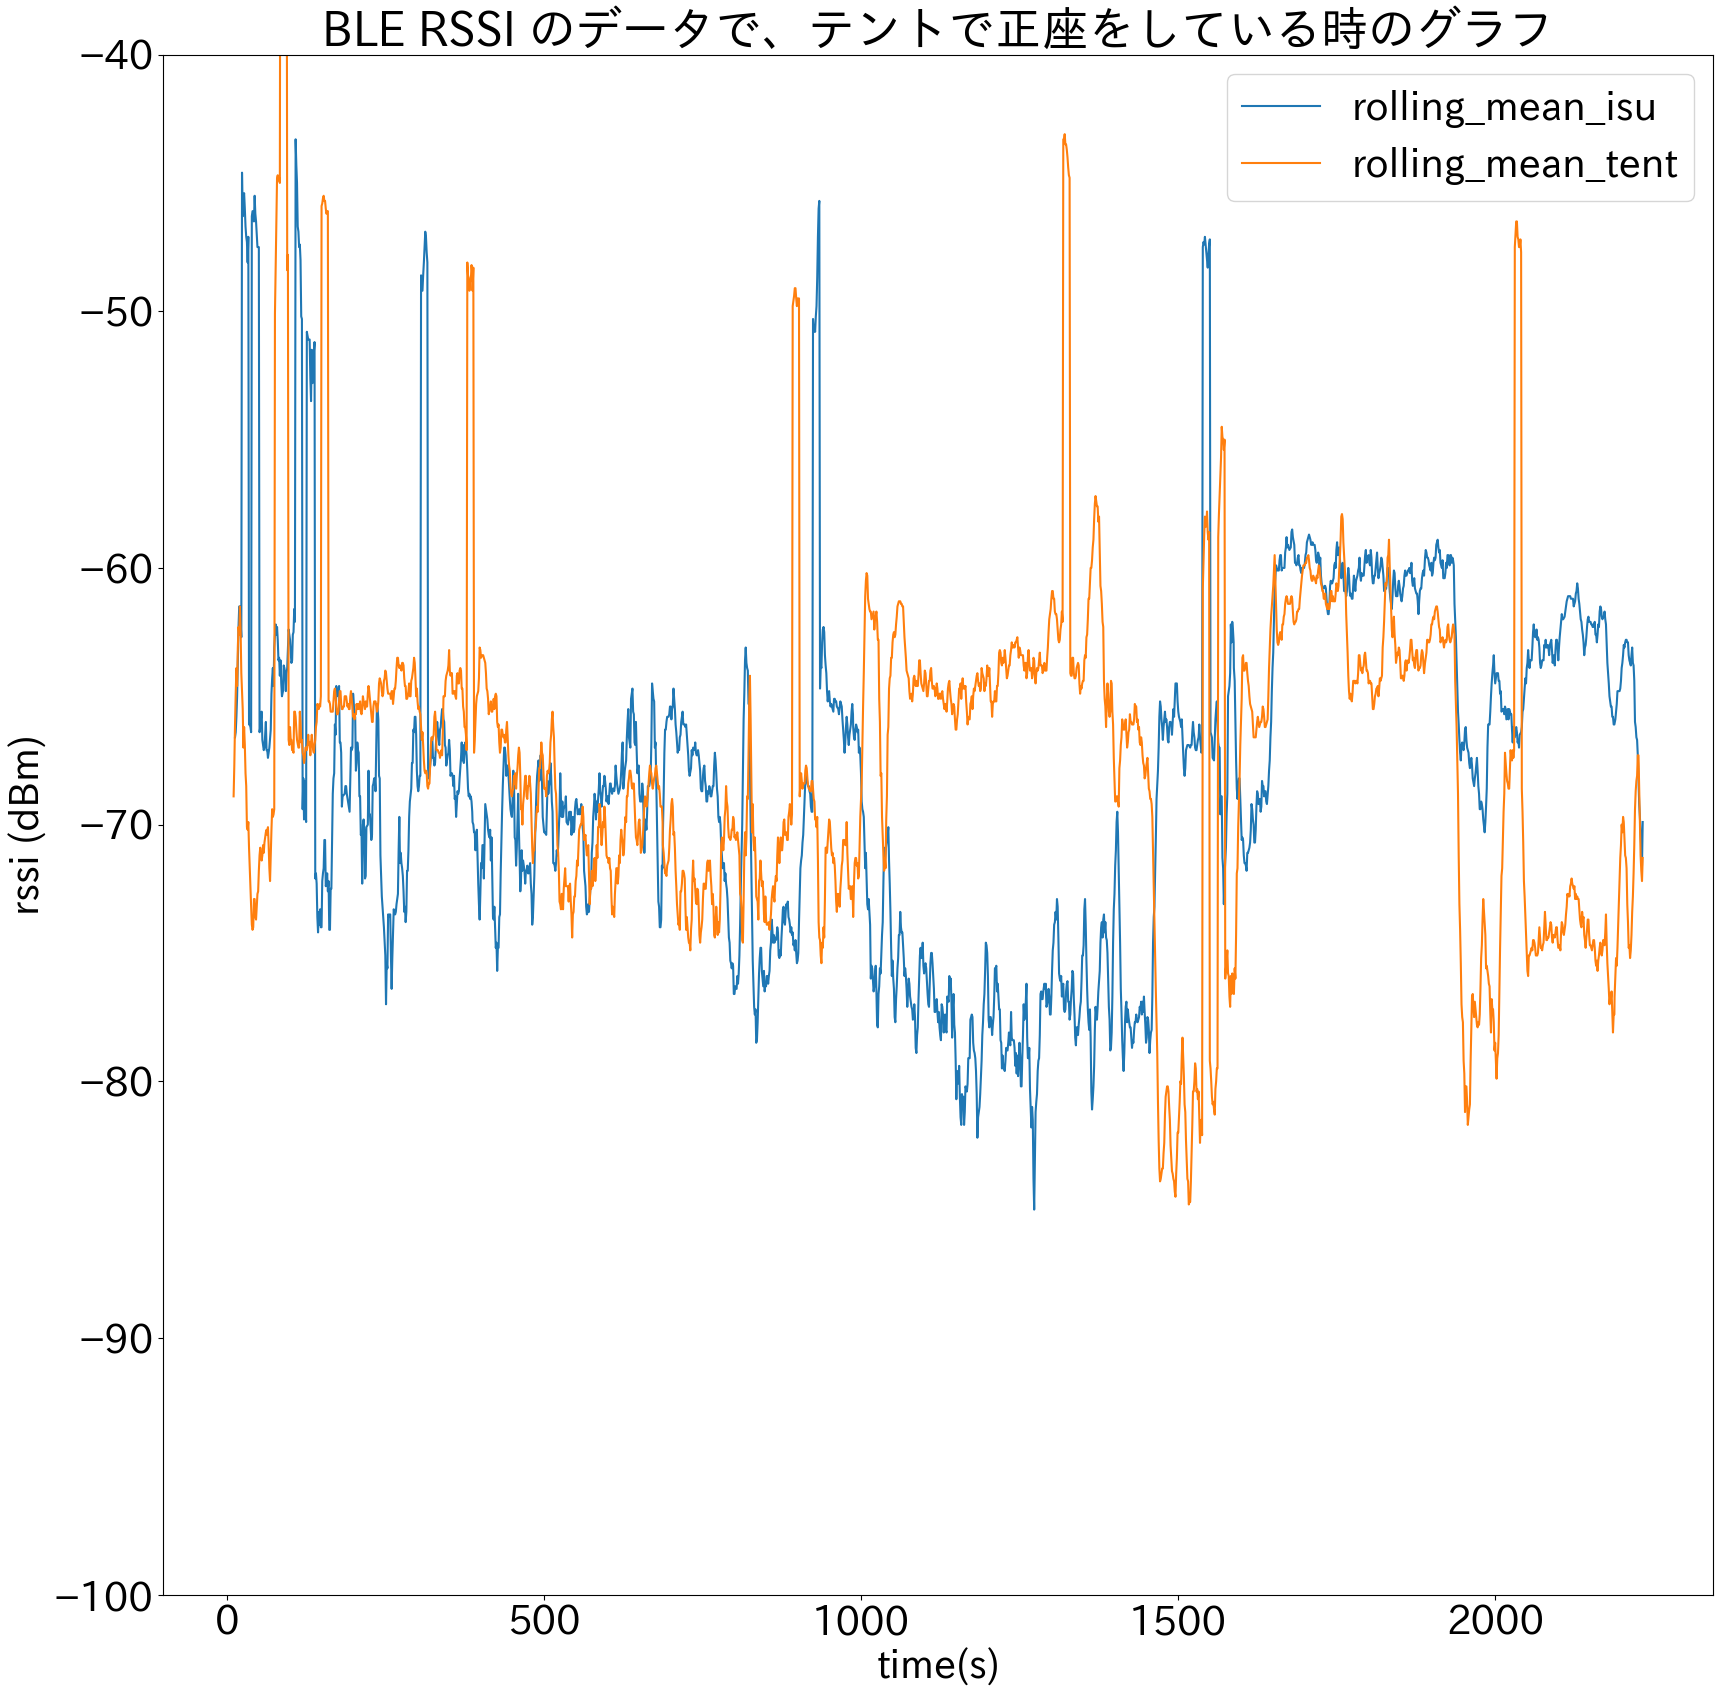

In [202]:
# ノイズ除去

# 2. データをグラフ化する
# 2.1. グラフのタイトルを設定する
plt.figure(figsize=(20, 20))
plt.title(f"BLE RSSI のデータで、{content}をしている時のグラフ")
# 2.2. グラフのx軸のラベルを設定する
plt.xlabel("time(s)")
# 2.3. グラフのy軸のラベルを設定する
plt.ylabel("rssi (dBm)")
# 2.4. グラフのx軸の表示範囲を設定する
# plt.xlim(start_time, end_time)
# 2.5. グラフのy軸の表示範囲を設定する
plt.ylim(-100, -40)
# 2.6. グラフにデータを追加する

# fft_isu_data を DataFrame に変換
df_isu = pd.DataFrame(fft_isu_data, columns=["time", "rssi"])
# time 列を基準に昇順にソート
df_isu.sort_values(by="time", inplace=True)
# ノイズ除去（移動平均を計算）
rolling_mean_isu = df_isu["rssi"].rolling(window=10).mean()

print(rolling_mean_isu)
print(fft_isu_data)

print(len(rolling_mean_isu))
print(len(fft_isu_data))

# x軸は時間の大きさで揃えるために、時間の差分を計算してリストに格納
time_diff_isu = [(x - df_isu["time"].iloc[0]) / 1000 for x in df_isu["time"]]


# グラフにデータを追加する
plt.plot(time_diff_isu, rolling_mean_isu, label="rolling_mean_isu")

# 同様にテントデータに対しても処理を行う
df_tent = pd.DataFrame(fft_tent_data, columns=["time", "rssi"])
df_tent.sort_values(by="time", inplace=True)
rolling_mean_tent = df_tent["rssi"].rolling(window=10).mean()

time_diff_tent = [(x - df_tent["time"].iloc[0]) / 1000 for x in df_tent["time"]]

plt.plot(time_diff_tent, rolling_mean_tent, label="rolling_mean_tent")

# 2.7. グラフに凡例を追加する
plt.legend()
# 2.8. グラフを表示する
plt.show()

In [203]:

# サンプリング周波数を計算する関数
def calculate_sampling_frequency(data):
    time_stamps = [data_point[0] / 1000 for data_point in data]  # 時間スタンプのリストを作成
    time_interval = time_stamps[-1] - time_stamps[0]  # データ点の間隔を計算
    sampling_frequency = 1 / (time_interval / len(data))  # サンプリング周波数を計算
    return sampling_frequency


sampling_frequency = calculate_sampling_frequency(fft_isu_data)
print("サンプリング周波数:", sampling_frequency)



サンプリング周波数: 0.870267834667852


In [204]:
# time_diff_isu を FFT してみる

### 量子化(離散化) ###
f_s = sampling_frequency # サンプリングレート f_s[Hz] (任意)
t_fin = abs(time_diff_isu[len(time_diff_isu) - 1]) # 収録終了時刻 [s] (任意)
dt = 1/f_s # サンプリング周期 dt[s]
N = int(f_s * t_fin) # サンプル数 [個]

print(t_fin)
print(dt)
print(f_s * t_fin)
print(f_s)

2232.646
1.149071538857531
1942.999999999841
0.870267834667852


In [205]:
### FFT: tの関数をfの関数にする ###
y_fft = np.fft.fft(abs(rolling_mean_isu[10:len(rolling_mean_isu)])) # 離散フーリエ変換
freq = np.fft.fftfreq(N, d=dt) # 周波数を割り当てる（※後述）
Amp = abs(y_fft/(N/2)) # 音の大きさ（振幅の大きさ）

print(f"サンプリング周波数: {sampling_frequency} Hz")
print(f"サンプリング間隔: {dt} sec")
print(f"データ数: {N}")
print(f"最大周波数: {sampling_frequency/2} Hz")
print(f"最大周波数のインデックス: {int(N/2)}")
print(f"最大周波数のインデックスに対応する周波数: {freq[int(N/2)]} Hz")
print(f"最大周波数の振幅: {Amp[int(N/2)]}")


print(rolling_mean_isu[10:len(rolling_mean_isu)])


サンプリング周波数: 0.870267834667852 Hz
サンプリング間隔: 1.149071538857531 sec
データ数: 1942
最大周波数: 0.435133917333926 Hz
最大周波数のインデックス: 971
最大周波数のインデックスに対応する周波数: -0.4351339173339259 Hz
最大周波数の振幅: 0.009741794773302562
10     -66.4
11     -65.8
12     -65.0
13     -63.7
14     -62.3
        ... 
1938   -69.2
1939   -69.7
1940   -71.0
1941   -71.6
1942   -69.9
Name: rssi, Length: 1933, dtype: float64


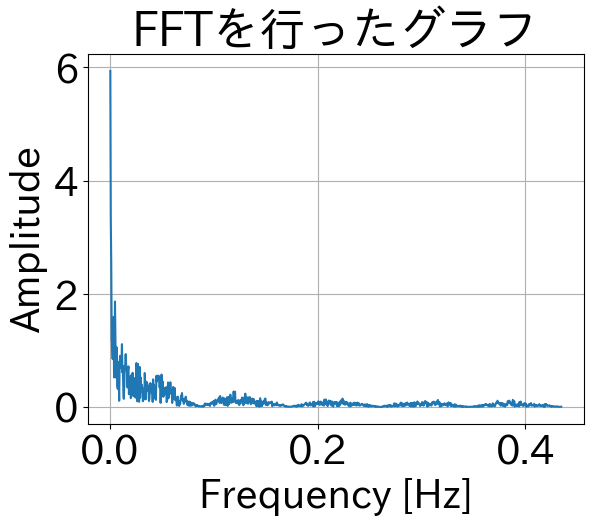

In [206]:
### 音波のスペクトル ###
plt.plot(freq[1:int(N/2)], Amp[1:int(N/2)]) # A-f グラフのプロット
# plt.xscale("log") # 横軸を対数軸にセット
# plt.xlim([1,10]) #x軸の範囲を1~5に指定

plt.xlabel("Frequency [Hz]") # 横軸のラベル
plt.ylabel("Amplitude") # 縦軸のラベル
plt.grid() # グリッド線を表示
plt.title("FFTを行ったグラフ") # グラフのタイトル
plt.show()